In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('fhir_visualization_test_df.csv', index_col = 0)

In [2]:
df.head()

,sample_id,case_id,type,gender,race,ethnicity,trisomy
0,HTP0017A4_RNA_paxgene,HTP0017,Gene Fusions,female,White,Not Hispanic or Latino,T21
1,HTP0017A4_RNA_paxgene,HTP0017,Gene Fusions,female,White,Not Hispanic or Latino,T21
2,HTP0017A4_RNA_paxgene,HTP0017,Gene Fusions,female,White,Not Hispanic or Latino,T21
3,HTP0017A4_RNA_paxgene,HTP0017,Gene Expression Quantifications,female,White,Not Hispanic or Latino,T21
4,HTP0017A4_RNA_paxgene,HTP0017,Gene Expression Quantifications,female,White,Not Hispanic or Latino,T21


In [3]:
# Identify missing values
# df[df == ""].count() # Empty cells imported as nan

df.isna().sum()

sample_id     0
case_id       0
type          0
gender        0
race         36
ethnicity    90
trisomy       0
dtype: int64

In [4]:
# Replace missing data with "No_Data" label
df.fillna('No Data', inplace=True)

In [5]:
# Sanity check
df[df == "No Data"].count()

sample_id     0
case_id       0
type          0
gender        0
race         36
ethnicity    90
trisomy       0
dtype: int64

In [7]:
# Tabulate data
df_race = df["race"].value_counts()
df_gender = df["gender"].value_counts()
df_ethnicity = df["ethnicity"].value_counts()
df_trisomy = df["trisomy"].value_counts()
df_type = df["type"].value_counts()

In [8]:
# check the values of 
# each row for each column
n = df.nunique(axis=0)
print("There are {} total files imported".format(len(df)))
print("There are {} unique case ids".format(n.case_id))

There are 2310 total files imported
There are 385 unique case ids


In [9]:
import panel as pn
pn.extension()

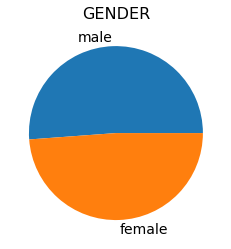

In [10]:
fig0 = plt.figure()
ax0 = fig0.subplots()
ax0.pie(df_gender, labels = df_gender.index, textprops={'fontsize': 14})
ax0.title.set_text('GENDER')
ax0.title.set_size(16)

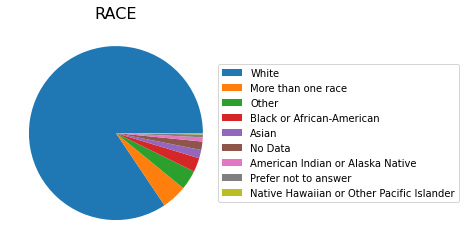

In [11]:
fig1 = plt.figure()
ax1 = fig1.subplots()
ax1.pie(df_race)
ax1.title.set_text('RACE')
ax1.title.set_size(16)
ax1.legend(df_race.index,
          loc = "center right", 
          bbox_to_anchor=(1, 0, 1.1, 1))

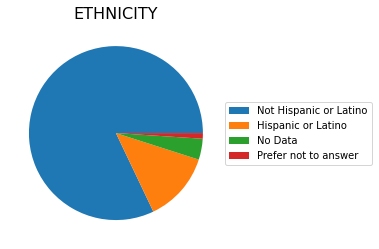

In [12]:
fig2 = plt.figure()
ax2 = fig2.subplots()
ax2.pie(df_ethnicity)
ax2.title.set_text('ETHNICITY')
ax2.title.set_size(16)
ax2.legend(df_ethnicity.index,
          loc = "center right", 
          bbox_to_anchor=(1, 0, 0.7, 1))

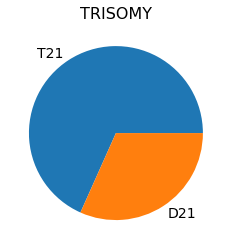

In [13]:
fig3 = plt.figure()
ax3 = fig3.subplots()
ax3.pie(df_trisomy, labels = df_trisomy.index, textprops={'fontsize': 14})
ax3.title.set_text('TRISOMY')
ax3.title.set_size(16)

In [32]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

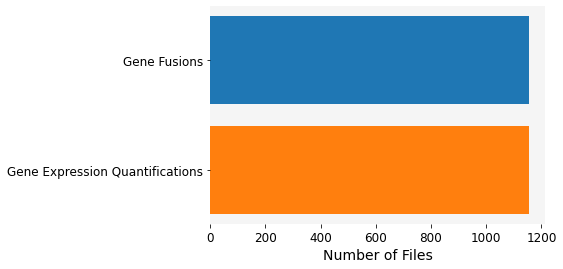

In [58]:
fig4 = plt.figure()
ax4 = fig4.subplots()
ax4.barh(df_type.index, df_type, color=colors[0:2])
ax4.invert_yaxis()
ax4.set_xlabel('Number of Files', fontsize = 14)
ax4.set_facecolor('whitesmoke')
ax4.spines[:].set_visible(False)
ax4.tick_params(axis='both', labelsize=12)


Matplotlib(Figure, tight=True)
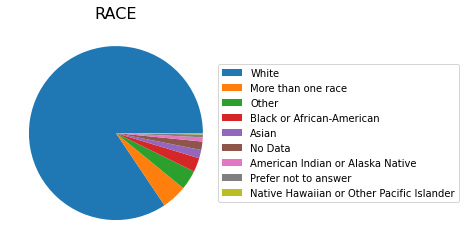

In [34]:
pn.pane.Matplotlib(fig1, tight = True)

In [35]:
options = ['Gender', 'Race', 'Ethnicity', 'Trisomy']
checkbox_group = pn.widgets.CheckBoxGroup(
    name='Checkbox Group', value= options, 
    options=options,
    inline=False)


In [36]:
checkbox_group.value

['Gender', 'Race', 'Ethnicity', 'Trisomy']

In [37]:
a = pn.pane.Matplotlib(fig0, tight=True)
b = pn.pane.Matplotlib(fig1, tight=True)
c = pn.pane.Matplotlib(fig2, tight=True)
d = pn.pane.Matplotlib(fig3, tight=True)

layout1 = pn.Row(pn.Column(a), 
                pn.Column(b),
                pn.Column(c),
                pn.Column(d))


controls1 = pn.Column(*(g.controls(['visible'])[1] for g in layout1))

# labels = pn.Column(options[0], options[1], options[2], options[3])
labels = pn.Column("<p style=line-height:2.2> Gender <br> Race <br> Ethnicity <br> Trisomy </p>")

pn.Row(labels,controls1)

Row
    [0] Column
        [0] Markdown(str)
    [1] Column
        [0] Checkbox(name='Visible', value=True)
        [1] Checkbox(name='Visible', value=True)
        [2] Checkbox(name='Visible', value=True)
        [3] Checkbox(name='Visible', value=True)

In [63]:
#Layout using FastListTemplate 
template = pn.template.FastListTemplate(
    title="INCLUDE FHIR VISUALIZATION",
    sidebar=[pn.pane.Markdown("## Number of Files Loaded: {}".format(len(df))),
             pn.pane.Markdown(""),
             pn.pane.Markdown("## Total Unique Patients: {}".format(n.case_id)),
             pn.pane.Markdown(""),
             pn.pane.Markdown("###Graphs"),
             pn.Row(labels, pn.Column(pn.Spacer(height = 10), controls1)), 
             pn.Spacer(height=100),
             pn.pane.PNG('SB Image.png', align = 'center' )],
    main=[pn.Column(pn.pane.Markdown("# Demographics"),
                    layout1),
          pn.Column(pn.pane.Markdown("# Data Type"),
                    pn.pane.Matplotlib(fig4, tight=True, height = 250)),
          pn.Row(pn.pane.Markdown("We can put other text or plots here"))],
    theme_toggle = False
).servable();

In [64]:
from bokeh.resources import INLINE
template.save('fhir-visualization-test.html', resources=INLINE)